<img src="img/header.png" alt="Challenge State of Data">

# Aula 02 - EDA - Análise Exploratória de Dados

## Análise de Salários na Área de Dados

Ontem a gente aprendeu um bocado na aula de pandas! O foco hoje, padawan, não é no Python (somente) mas nas Análise Exploratória de Dados, também conhecida como **EDA (Exploratory Data Analysis)**. 

Como o dataset é MUITO grande, vamos mergulhar fundo nos dados de salários da área de dados brasileira. Nosso objetivo é descobrir padrões, tendências e insights interessantes através de visualizações bonitas e análises estatísticas.

Importante que, apesar de criamos um MONTE de gráficos, a ideia aqui não é BELEZA, mas extração de insights!! Só na aula de DataViz nos preocupamos em deixar a banca examinadora de QUEIXO CAÍDO com os gráficos, mas hoje é COMPREENDER, extrair INFORMAÇÕES a partir de dados brutos.

Simbora?!

### Objetivos:
- Realizar análise exploratória de Dados relacionados a salários
- Explorar a distribuição salarial
- Identificar fatores que influenciam os salários
- Criar visualizações informativas
- Extrair insights valiosos para profissionais da área

Mas antes....


<img src="img/para_tudo.png" />

# PARA, PARA, PARA TUDO!

## TODO MUNDO NO KAGGLE AGOOORA!

[Clica aqui que chega lá!](https://www.kaggle.com/datasets/datahackers/state-of-data-brazil-20242025)

Agora deixa um UPVOTE porque esse Dataset DEU TRABALHO! SIM, DE NOVO! :D

## 1. Importações e Configurações

Primeiro, vamos importar todas as bibliotecas necessárias para nossa análise exploratória:


In [1]:
# Manipulação de dados (nossos velhos conhecidos, só o numpy a gente não usou)
import pandas as pd
import numpy as np

In [2]:
# Visualizações (virgem, que tanto de biblioteca!!! trouxe várias pra deixar pra vocês brincarem!)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# Estatísticas 
from scipy import stats
import warnings

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configurações do matplotlib (calma que amanhã tem dataviz! hoje é só uns gráficos simples)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 2. Carregamento e Visão Geral dos Dados

Aqui vamos nos preparar para a nossa análise final! Cabe a você escolher uma análise bem massa pra ganhar esse Switch 2!

Como tem MUITA coisa pra analisar, vamos tentar extrair insights relacionados a remuneração, afinal, esses boletos não vão se pagar sozinhos!

Pra isso temos que deixar nosso dataset bem arrumadinho.

Vamos focar nas colunas que nos darão informações sobre:
- **Faixa salarial atual** dos profissionais
- **Fatores que influenciam a satisfação** com remuneração
- **Critérios de escolha** relacionados a salário
- **Informações demográficas e profissionais** para segmentação



In [4]:
df_completo = pd.read_csv('data/raw/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv')


In [5]:
# Vamos identificar e renomear as colunas relacionadas à remuneração
colunas_remuneracao = {
    '1.a.1_faixa_idade': 'faixa_etaria',
    '1.b_genero': 'genero',
    '1.c_cor/raca/etnia': 'etnia',
    '1.a_idade': 'idade',
    '1.d_pcd': 'pcd',
    '1.e_experiencia_profissional_prejudicada': 'xp_profissional_prejudicada',
    '1.i.1_uf_onde_mora': 'uf_residencia',
    '1.l_nivel_de_ensino': 'nivel_ensino',
    '1.m_área_de_formação': 'area_formacao',
    '2.a_situação_de_trabalho': 'situacao_trabalho',
    '2.f_cargo_atual': 'cargo_atual',
    '2.h_faixa_salarial': 'faixa_salarial',
    '2.i_tempo_de_experiencia_em_dados': 'tempo_experiencia_dados',
    '2.l.1_Remuneração/Salário': 'satisfacao_remuneracao',
    '2.o.1_Remuneração/Salário': 'importancia_salario_escolha_emprego',
    '2.l.2_Benefícios': 'satisfacao_beneficios',
    '2.o.2_Benefícios': 'importancia_beneficios_escolha_emprego'
}

# Renomeando as colunas de remuneração
df_remuneracoes = df_completo[colunas_remuneracao.keys()]
df_remuneracoes = df_remuneracoes.rename(columns=colunas_remuneracao)

print("Colunas relacionadas à remuneração renomeadas:")
for original, novo in colunas_remuneracao.items():
    print(f"  {original} -> {novo}")
    
print("\nVamos ver os dados dessas colunas:")
colunas_salario = list(colunas_remuneracao.values())
df_remuneracoes[colunas_salario].head()


Colunas relacionadas à remuneração renomeadas:
  1.a.1_faixa_idade -> faixa_etaria
  1.b_genero -> genero
  1.c_cor/raca/etnia -> etnia
  1.a_idade -> idade
  1.d_pcd -> pcd
  1.e_experiencia_profissional_prejudicada -> xp_profissional_prejudicada
  1.i.1_uf_onde_mora -> uf_residencia
  1.l_nivel_de_ensino -> nivel_ensino
  1.m_área_de_formação -> area_formacao
  2.a_situação_de_trabalho -> situacao_trabalho
  2.f_cargo_atual -> cargo_atual
  2.h_faixa_salarial -> faixa_salarial
  2.i_tempo_de_experiencia_em_dados -> tempo_experiencia_dados
  2.l.1_Remuneração/Salário -> satisfacao_remuneracao
  2.o.1_Remuneração/Salário -> importancia_salario_escolha_emprego
  2.l.2_Benefícios -> satisfacao_beneficios
  2.o.2_Benefícios -> importancia_beneficios_escolha_emprego

Vamos ver os dados dessas colunas:


,faixa_etaria,genero,etnia,idade,pcd,xp_profissional_prejudicada,uf_residencia,nivel_ensino,area_formacao,situacao_trabalho,cargo_atual,faixa_salarial,tempo_experiencia_dados,satisfacao_remuneracao,importancia_salario_escolha_emprego,satisfacao_beneficios,importancia_beneficios_escolha_emprego
0,17-21,Masculino,Branca,18,Não,NaN,RS,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de Dados/Data Analyst,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,NaN,1.0,NaN,0.0
1,17-21,Masculino,Branca,18,Não,NaN,SC,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de BI/BI Analyst,Menos de R$ 1.000/mês,Menos de 1 ano,NaN,0.0,NaN,0.0
2,17-21,Masculino,Parda,18,Não,Não acredito que minha experiência profissiona...,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Outra Opção,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,1.0,1.0,0.0,0.0
3,17-21,Masculino,Branca,18,Não,NaN,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de Dados/Data Analyst,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,NaN,1.0,NaN,0.0
4,17-21,Masculino,Branca,18,Não,NaN,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Desenvolvedor/ Engenheiro de Software/ Analist...,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,NaN,0.0,NaN,0.0


In [6]:
# Vamos limpar o dataset pra deixar só com com colunas relacionadas a salário!
# Removendo apenas linhas sem informação de faixa salarial (nossa variável principal)
df_salarios_limpo = df_remuneracoes.dropna(subset=['faixa_salarial'])

print(f"Dataset de salários original: {len(df_remuneracoes)} linhas")
print(f"Dataset de salários limpo: {len(df_salarios_limpo)} linhas")
print(f"Linhas removidas: {len(df_remuneracoes) - len(df_salarios_limpo)}")

# Verificando a distribuição final
print(f"\nDistribuição final das faixas salariais:")
print(df_salarios_limpo['faixa_salarial'].value_counts().sort_index())

# Salvando o dataset específico para análise de remuneração
df_salarios_limpo.to_csv('data/processed/dataset_salarios_dados.csv', index=False)

Dataset de salários original: 5217 linhas
Dataset de salários limpo: 4863 linhas
Linhas removidas: 354

Distribuição final das faixas salariais:
faixa_salarial
Acima de R$ 40.001/mês               104
Menos de R$ 1.000/mês                 33
de R$ 1.001/mês a R$ 2.000/mês       155
de R$ 12.001/mês a R$ 16.000/mês     716
de R$ 16.001/mês a R$ 20.000/mês     456
de R$ 2.001/mês a R$ 3.000/mês       237
de R$ 20.001/mês a R$ 25.000/mês     246
de R$ 25.001/mês a R$ 30.000/mês     159
de R$ 3.001/mês a R$ 4.000/mês       270
de R$ 30.001/mês a R$ 40.000/mês     158
de R$ 4.001/mês a R$ 6.000/mês       593
de R$ 6.001/mês a R$ 8.000/mês       656
de R$ 8.001/mês a R$ 12.000/mês     1080
Name: count, dtype: int64


In [7]:
df_salarios_limpo.head()

,faixa_etaria,genero,etnia,idade,pcd,xp_profissional_prejudicada,uf_residencia,nivel_ensino,area_formacao,situacao_trabalho,cargo_atual,faixa_salarial,tempo_experiencia_dados,satisfacao_remuneracao,importancia_salario_escolha_emprego,satisfacao_beneficios,importancia_beneficios_escolha_emprego
0,17-21,Masculino,Branca,18,Não,NaN,RS,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de Dados/Data Analyst,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,NaN,1.0,NaN,0.0
1,17-21,Masculino,Branca,18,Não,NaN,SC,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de BI/BI Analyst,Menos de R$ 1.000/mês,Menos de 1 ano,NaN,0.0,NaN,0.0
2,17-21,Masculino,Parda,18,Não,Não acredito que minha experiência profissiona...,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Outra Opção,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,1.0,1.0,0.0,0.0
3,17-21,Masculino,Branca,18,Não,NaN,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de Dados/Data Analyst,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,NaN,1.0,NaN,0.0
4,17-21,Masculino,Branca,18,Não,NaN,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Desenvolvedor/ Engenheiro de Software/ Analist...,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,NaN,0.0,NaN,0.0


In [8]:
# Carregando o dataset limpo
df = pd.read_csv('data/processed/dataset_salarios_dados.csv')

print(f"📊 Dataset carregado com sucesso!")
print(f"   • Linhas: {len(df):,}")
print(f"   • Colunas: {len(df.columns)}")
print(f"   • Período: Pesquisa State of Data 2024")

📊 Dataset carregado com sucesso!
   • Linhas: 4,863
   • Colunas: 17
   • Período: Pesquisa State of Data 2024


In [9]:
# Visão geral dos dados
print("\n🔍 Primeiras 5 linhas:")
df.head()


🔍 Primeiras 5 linhas:


,faixa_etaria,genero,etnia,idade,pcd,xp_profissional_prejudicada,uf_residencia,nivel_ensino,area_formacao,situacao_trabalho,cargo_atual,faixa_salarial,tempo_experiencia_dados,satisfacao_remuneracao,importancia_salario_escolha_emprego,satisfacao_beneficios,importancia_beneficios_escolha_emprego
0,17-21,Masculino,Branca,18,Não,NaN,RS,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de Dados/Data Analyst,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,NaN,1.0,NaN,0.0
1,17-21,Masculino,Branca,18,Não,NaN,SC,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de BI/BI Analyst,Menos de R$ 1.000/mês,Menos de 1 ano,NaN,0.0,NaN,0.0
2,17-21,Masculino,Parda,18,Não,Não acredito que minha experiência profissiona...,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Outra Opção,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,1.0,1.0,0.0,0.0
3,17-21,Masculino,Branca,18,Não,NaN,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de Dados/Data Analyst,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,NaN,1.0,NaN,0.0
4,17-21,Masculino,Branca,18,Não,NaN,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Desenvolvedor/ Engenheiro de Software/ Analist...,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,NaN,0.0,NaN,0.0


In [10]:
# Informações básicas sobre o dataset
print("📋 Informações básicas do dataset:")
print("=" * 50)
df.info()

📋 Informações básicas do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4863 entries, 0 to 4862
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   faixa_etaria                            4863 non-null   object 
 1   genero                                  4863 non-null   object 
 2   etnia                                   4863 non-null   object 
 3   idade                                   4863 non-null   int64  
 4   pcd                                     4863 non-null   object 
 5   xp_profissional_prejudicada             2424 non-null   object 
 6   uf_residencia                           4733 non-null   object 
 7   nivel_ensino                            4863 non-null   object 
 8   area_formacao                           4782 non-null   object 
 9   situacao_trabalho                       4863 non-null   object 
 10  cargo_atual               

In [11]:
print("\n📊 Estatísticas descritivas das colunas numéricas:")
print("=" * 50)
df.describe() # Esse método é animal! Já traz um monte de estatísticas básicas


📊 Estatísticas descritivas das colunas numéricas:


,idade,satisfacao_remuneracao,importancia_salario_escolha_emprego,satisfacao_beneficios,importancia_beneficios_escolha_emprego
count,4863.000000,1527.000000,4863.000000,1527.000000,4863.000000
mean,32.334362,0.445972,0.810405,0.170923,0.254164
std,7.185878,0.497235,0.392021,0.376565,0.435435
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,1.000000,0.000000,0.000000
50%,31.000000,0.000000,1.000000,0.000000,0.000000
75%,36.000000,1.000000,1.000000,0.000000,1.000000
max,68.000000,1.000000,1.000000,1.000000,1.000000


## 3. Preparação dos Dados para Análise


In [12]:
# Criando uma função para extrair valores numéricos das faixas salariais
def extrair_valor_medio_salario(faixa_salarial):
    """Extrai o valor médio de uma faixa salarial em reais"""
    if pd.isna(faixa_salarial):
        return np.nan
    
    # Mapeamento das faixas salariais
    mapeamento = {
        'Menos de R$ 1.000/mês': 500,
        'de R$ 1.001/mês a R$ 2.000/mês': 1500,
        'de R$ 2.001/mês a R$ 3.000/mês': 2500,
        'de R$ 3.001/mês a R$ 4.000/mês': 3500,
        'de R$ 4.001/mês a R$ 6.000/mês': 5000,
        'de R$ 6.001/mês a R$ 8.000/mês': 7000,
        'de R$ 8.001/mês a R$ 12.000/mês': 10000,
        'de R$ 12.001/mês a R$ 16.000/mês': 14000,
        'de R$ 16.001/mês a R$ 20.000/mês': 18000,
        'de R$ 20.001/mês a R$ 25.000/mês': 22500,
        'de R$ 25.001/mês a R$ 30.000/mês': 27500,
        'de R$ 30.001/mês a R$ 40.000/mês': 35000,
        'Acima de R$ 40.001/mês': 50000  # Valor estimado
    }
    
    return mapeamento.get(faixa_salarial, np.nan)

# Aplicando a função para criar uma coluna numérica de salário
df['salario_medio'] = df['faixa_salarial'].apply(extrair_valor_medio_salario)

print("✅ Coluna 'salario_medio' criada com sucesso!")
print(f"   • Valores únicos: {df['salario_medio'].nunique()}")
print(f"   • Valores não nulos: {df['salario_medio'].notna().sum():,}")
print(f"   • Salário médio geral: R$ {df['salario_medio'].mean():.2f}")
print(f"   • Salário mediano: R$ {df['salario_medio'].median():.2f}")


✅ Coluna 'salario_medio' criada com sucesso!
   • Valores únicos: 13
   • Valores não nulos: 4,863
   • Salário médio geral: R$ 12135.10
   • Salário mediano: R$ 10000.00


In [13]:
# Criando ordem para as faixas salariais
ordem_faixas = [
    'Menos de R$ 1.000/mês',
    'de R$ 1.001/mês a R$ 2.000/mês',
    'de R$ 2.001/mês a R$ 3.000/mês',
    'de R$ 3.001/mês a R$ 4.000/mês',
    'de R$ 4.001/mês a R$ 6.000/mês',
    'de R$ 6.001/mês a R$ 8.000/mês',
    'de R$ 8.001/mês a R$ 12.000/mês',
    'de R$ 12.001/mês a R$ 16.000/mês',
    'de R$ 16.001/mês a R$ 20.000/mês',
    'de R$ 20.001/mês a R$ 25.000/mês',
    'de R$ 25.001/mês a R$ 30.000/mês',
    'de R$ 30.001/mês a R$ 40.000/mês',
    'Acima de R$ 40.001/mês'
]

In [14]:
# Convertendo para categorical com ordem
df['faixa_salarial'] = pd.Categorical(df['faixa_salarial'], categories=ordem_faixas, ordered=True)

# Criando labels mais curtos para visualizações
labels_curtos = {
    'Menos de R$ 1.000/mês': '<R$ 1K',
    'de R$ 1.001/mês a R$ 2.000/mês': 'R$ 1-2K',
    'de R$ 2.001/mês a R$ 3.000/mês': 'R$ 2-3K',
    'de R$ 3.001/mês a R$ 4.000/mês': 'R$ 3-4K',
    'de R$ 4.001/mês a R$ 6.000/mês': 'R$ 4-6K',
    'de R$ 6.001/mês a R$ 8.000/mês': 'R$ 6-8K',
    'de R$ 8.001/mês a R$ 12.000/mês': 'R$ 8-12K',
    'de R$ 12.001/mês a R$ 16.000/mês': 'R$ 12-16K',
    'de R$ 16.001/mês a R$ 20.000/mês': 'R$ 16-20K',
    'de R$ 20.001/mês a R$ 25.000/mês': 'R$ 20-25K',
    'de R$ 25.001/mês a R$ 30.000/mês': 'R$ 25-30K',
    'de R$ 30.001/mês a R$ 40.000/mês': 'R$ 30-40K',
    'Acima de R$ 40.001/mês': '>R$ 40K'
}

df['faixa_salarial_curta'] = df['faixa_salarial'].map(labels_curtos)

print("✅ Preparação dos dados concluída!")
print(f"   • Faixas salariais ordenadas: {len(ordem_faixas)}")
print(f"   • Labels curtos criados para visualizações")

✅ Preparação dos dados concluída!
   • Faixas salariais ordenadas: 13
   • Labels curtos criados para visualizações


In [15]:
df['faixa_salarial_curta'].head()

0    R$ 1-2K
1     <R$ 1K
2    R$ 1-2K
3    R$ 1-2K
4    R$ 1-2K
Name: faixa_salarial_curta, dtype: category
Categories (13, object): ['<R$ 1K' < 'R$ 1-2K' < 'R$ 2-3K' < 'R$ 3-4K' ... 'R$ 20-25K' < 'R$ 25-30K' < 'R$ 30-40K' < '>R$ 40K']

## 4. Análise Univariada - Distribuições

### 4.1 Distribuição Salarial Geral


In [16]:
# Usando o value counts pra começar a brincadeira
df['faixa_salarial'].value_counts()

faixa_salarial
de R$ 8.001/mês a R$ 12.000/mês     1080
de R$ 12.001/mês a R$ 16.000/mês     716
de R$ 6.001/mês a R$ 8.000/mês       656
de R$ 4.001/mês a R$ 6.000/mês       593
de R$ 16.001/mês a R$ 20.000/mês     456
de R$ 3.001/mês a R$ 4.000/mês       270
de R$ 20.001/mês a R$ 25.000/mês     246
de R$ 2.001/mês a R$ 3.000/mês       237
de R$ 25.001/mês a R$ 30.000/mês     159
de R$ 30.001/mês a R$ 40.000/mês     158
de R$ 1.001/mês a R$ 2.000/mês       155
Acima de R$ 40.001/mês               104
Menos de R$ 1.000/mês                 33
Name: count, dtype: int64

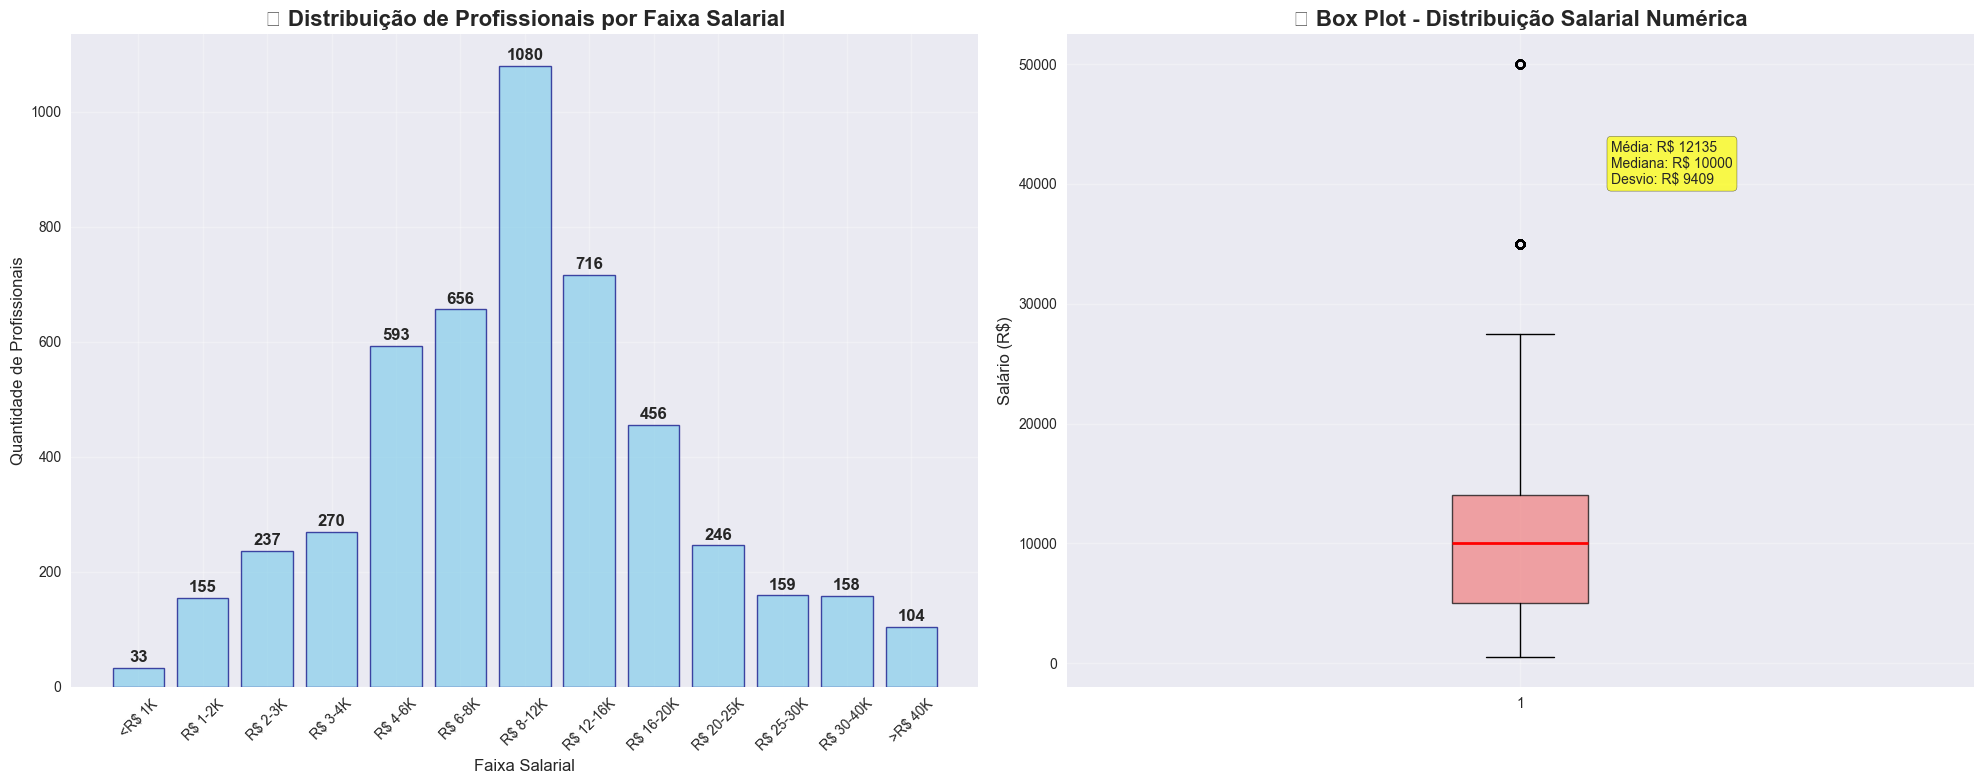

In [17]:
# Gráfico de distribuição salarial - Versão Matplotlib/Seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Histograma da distribuição salarial
counts = df['faixa_salarial'].value_counts(sort=False)
ax1.bar(range(len(counts)), counts.values, color='skyblue', alpha=0.7, edgecolor='navy', linewidth=1)
ax1.set_title('📊 Distribuição de Profissionais por Faixa Salarial', fontsize=16, fontweight='bold')
ax1.set_xlabel('Faixa Salarial', fontsize=12)
ax1.set_ylabel('Quantidade de Profissionais', fontsize=12)
ax1.set_xticks(range(len(counts)))
ax1.set_xticklabels([labels_curtos[faixa] for faixa in counts.index], rotation=45)
ax1.grid(True, alpha=0.3)

# Adicionando valores nas barras
for i, v in enumerate(counts.values):
    ax1.text(i, v + 10, str(v), ha='center', fontweight='bold')

# Box plot da distribuição salarial numérica
box_data = df['salario_medio'].dropna()
ax2.boxplot(box_data, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightcoral', alpha=0.7),
           medianprops=dict(color='red', linewidth=2))
ax2.set_title('📈 Box Plot - Distribuição Salarial Numérica', fontsize=16, fontweight='bold')
ax2.set_ylabel('Salário (R$)', fontsize=12)
ax2.grid(True, alpha=0.3)

# Adicionando estatísticas no box plot
stats_text = f"Média: R$ {box_data.mean():.0f}\nMediana: R$ {box_data.median():.0f}\nDesvio: R$ {box_data.std():.0f}"
ax2.text(1.1, box_data.max() * 0.8, stats_text, fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

In [18]:
# Estatísticas detalhadas
print("📊 ESTATÍSTICAS SALARIAIS DETALHADAS")
print("=" * 50)
print(f"💰 Salário Médio: R$ {df['salario_medio'].mean():.2f}")
print(f"🎯 Salário Mediano: R$ {df['salario_medio'].median():.2f}")
print(f"📈 Desvio Padrão: R$ {df['salario_medio'].std():.2f}")
print(f"⬇️  Salário Mínimo: R$ {df['salario_medio'].min():.2f}")
print(f"⬆️  Salário Máximo: R$ {df['salario_medio'].max():.2f}")
print(f"📊 Faixa mais comum: {df['faixa_salarial'].mode().iloc[0]}")
print(f"👥 Total de profissionais: {len(df):,}")

📊 ESTATÍSTICAS SALARIAIS DETALHADAS
💰 Salário Médio: R$ 12135.10
🎯 Salário Mediano: R$ 10000.00
📈 Desvio Padrão: R$ 9408.65
⬇️  Salário Mínimo: R$ 500.00
⬆️  Salário Máximo: R$ 50000.00
📊 Faixa mais comum: de R$ 8.001/mês a R$ 12.000/mês
👥 Total de profissionais: 4,863


## 5. Análise Bivariada - Fatores que Influenciam os Salários

### 5.1 Análise Salarial por Gênero


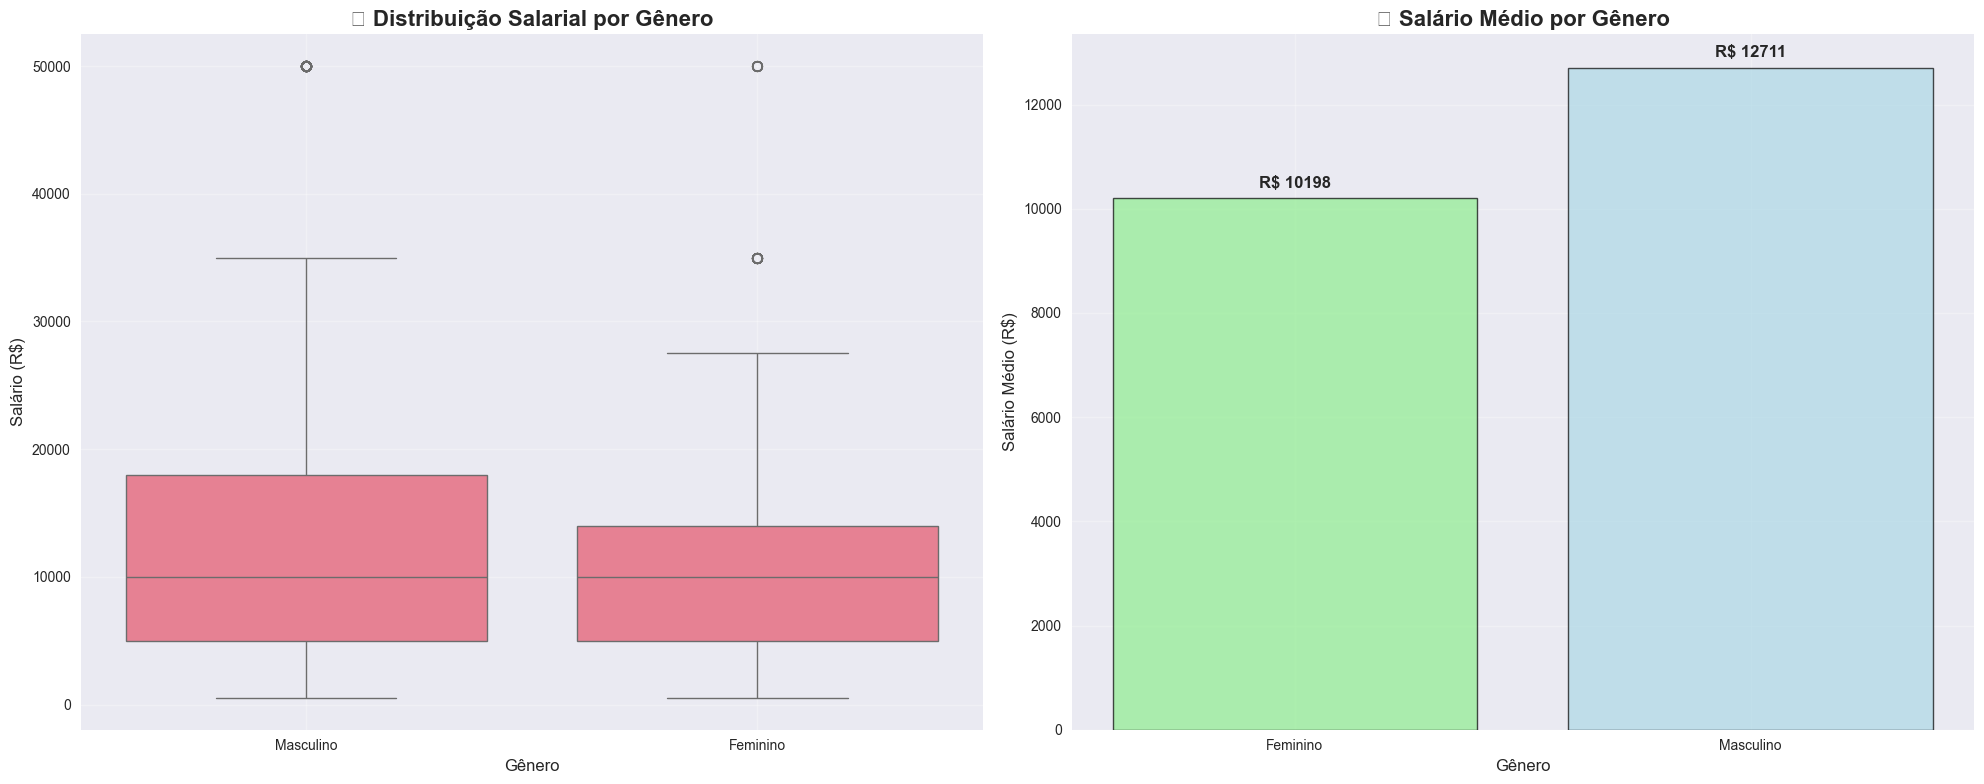

In [19]:
# Análise salarial por gênero
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico de boxplot por gênero
df_genero = df[df['genero'].isin(['Masculino', 'Feminino'])]  # Focando nos dois gêneros principais
sns.boxplot(data=df_genero, x='genero', y='salario_medio', ax=ax1)
ax1.set_title('💼 Distribuição Salarial por Gênero', fontsize=16, fontweight='bold')
ax1.set_ylabel('Salário (R$)', fontsize=12)
ax1.set_xlabel('Gênero', fontsize=12)
ax1.grid(True, alpha=0.3)

# Gráfico de barras com salário médio por gênero
salario_por_genero = df_genero.groupby('genero')['salario_medio'].mean()
colors = ['lightgreen', 'lightblue']
bars = ax2.bar(salario_por_genero.index, salario_por_genero.values, color=colors, alpha=0.7, edgecolor='black', linewidth=1)
ax2.set_title('📊 Salário Médio por Gênero', fontsize=16, fontweight='bold')
ax2.set_ylabel('Salário Médio (R$)', fontsize=12)
ax2.set_xlabel('Gênero', fontsize=12)
ax2.grid(True, alpha=0.3)

# Adicionando valores nas barras
for i, (genero, valor) in enumerate(salario_por_genero.items()):
    ax2.text(i, valor + 200, f'R$ {valor:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [20]:
# Estatísticas por gênero
print("📊 ANÁLISE SALARIAL POR GÊNERO")
print("=" * 50)
for genero in ['Masculino', 'Feminino']:
    dados_genero = df_genero[df_genero['genero'] == genero]['salario_medio']
    print(f"\n{genero}:")
    print(f"  💰 Salário Médio: R$ {dados_genero.mean():.2f}")
    print(f"  🎯 Salário Mediano: R$ {dados_genero.median():.2f}")
    print(f"  👥 Total de profissionais: {len(dados_genero):,}")

# Calculando gap salarial
gap_salarial = ((salario_por_genero['Masculino'] - salario_por_genero['Feminino']) / salario_por_genero['Masculino']) * 100
print(f"\n⚖️  GAP SALARIAL: {gap_salarial:.1f}%")
print(f"   (Homens ganham {gap_salarial:.1f}% a mais que mulheres em média)")

📊 ANÁLISE SALARIAL POR GÊNERO

Masculino:
  💰 Salário Médio: R$ 12710.54
  🎯 Salário Mediano: R$ 10000.00
  👥 Total de profissionais: 3,700

Feminino:
  💰 Salário Médio: R$ 10197.90
  🎯 Salário Mediano: R$ 10000.00
  👥 Total de profissionais: 1,142

⚖️  GAP SALARIAL: 19.8%
   (Homens ganham 19.8% a mais que mulheres em média)


### 5.2 Análise Salarial por Experiência em Dados


In [21]:
# Análise salarial por experiência
ordem_experiencia = [
    'Não tenho experiência na área de dados',
    'Menos de 1 ano',
    'de 1 a 2 anos',
    'de 3 a 4 anos',
    'de 5 a 6 anos',
    'de 7 a 10 anos',
    'Mais de 10 anos'
]

# Filtrando dados válidos
df_experiencia = df[df['tempo_experiencia_dados'].notna()] # outra forma df.loc[~df['tempo_experiencia_dados'].isna()]
df_experiencia = df_experiencia[df_experiencia['tempo_experiencia_dados'].isin(ordem_experiencia)]

df_experiencia.head()

,faixa_etaria,genero,etnia,idade,pcd,xp_profissional_prejudicada,uf_residencia,nivel_ensino,area_formacao,situacao_trabalho,cargo_atual,faixa_salarial,tempo_experiencia_dados,satisfacao_remuneracao,importancia_salario_escolha_emprego,satisfacao_beneficios,importancia_beneficios_escolha_emprego,salario_medio,faixa_salarial_curta
0,17-21,Masculino,Branca,18,Não,NaN,RS,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de Dados/Data Analyst,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,NaN,1.0,NaN,0.0,1500,R$ 1-2K
1,17-21,Masculino,Branca,18,Não,NaN,SC,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de BI/BI Analyst,Menos de R$ 1.000/mês,Menos de 1 ano,NaN,0.0,NaN,0.0,500,<R$ 1K
2,17-21,Masculino,Parda,18,Não,Não acredito que minha experiência profissiona...,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Outra Opção,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,1.0,1.0,0.0,0.0,1500,R$ 1-2K
3,17-21,Masculino,Branca,18,Não,NaN,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de Dados/Data Analyst,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,NaN,1.0,NaN,0.0,1500,R$ 1-2K
4,17-21,Masculino,Branca,18,Não,NaN,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Desenvolvedor/ Engenheiro de Software/ Analist...,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,NaN,0.0,NaN,0.0,1500,R$ 1-2K


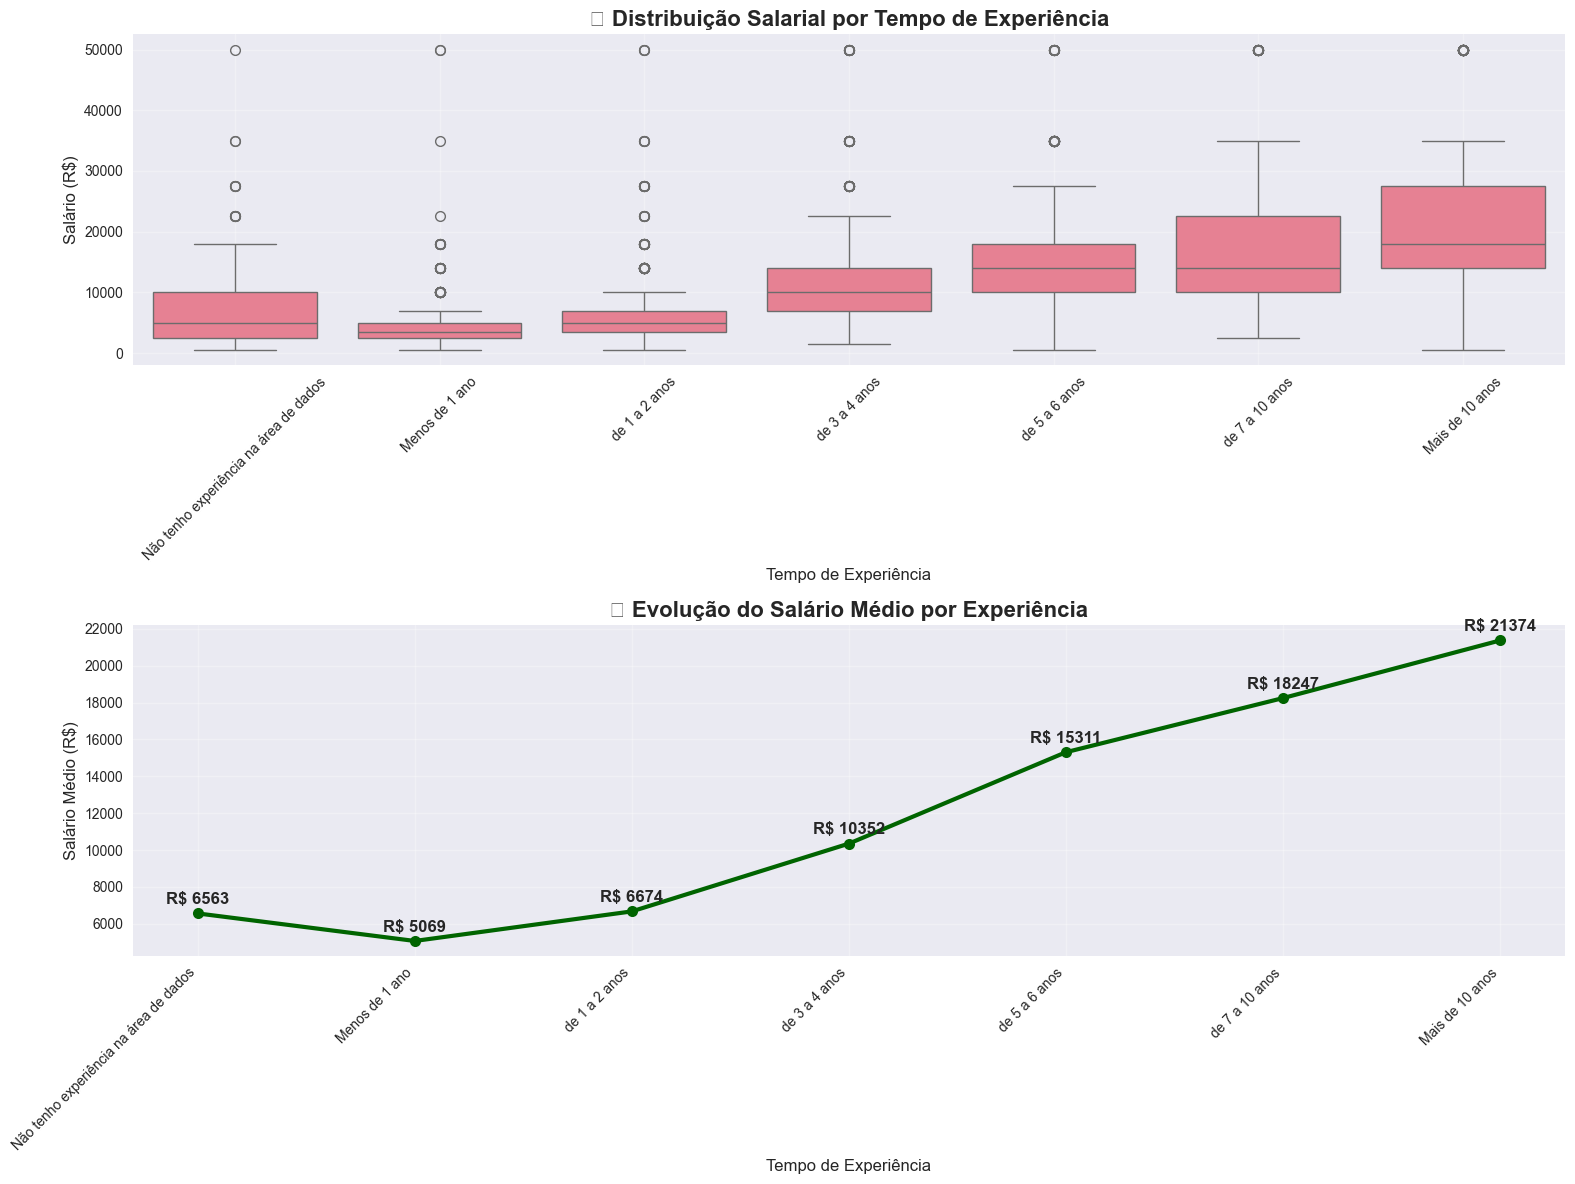

In [22]:
# Criando gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Gráfico de boxplot por experiência
sns.boxplot(data=df_experiencia, x='tempo_experiencia_dados', y='salario_medio', ax=ax1, order=ordem_experiencia)
ax1.set_title('📈 Distribuição Salarial por Tempo de Experiência', fontsize=16, fontweight='bold')
ax1.set_ylabel('Salário (R$)', fontsize=12)
ax1.set_xlabel('Tempo de Experiência', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Gráfico de linha com progressão salarial
salario_por_experiencia = df_experiencia.groupby('tempo_experiencia_dados')['salario_medio'].mean().reindex(ordem_experiencia)
ax2.plot(range(len(salario_por_experiencia)), salario_por_experiencia.values, marker='o', linewidth=3, markersize=8, color='darkgreen')
ax2.set_title('📊 Evolução do Salário Médio por Experiência', fontsize=16, fontweight='bold')
ax2.set_ylabel('Salário Médio (R$)', fontsize=12)
ax2.set_xlabel('Tempo de Experiência', fontsize=12)
ax2.set_xticks(range(len(salario_por_experiencia)))
ax2.set_xticklabels(ordem_experiencia, rotation=45, ha='right')
ax2.grid(True, alpha=0.3)

# Adicionando valores nos pontos
for i, valor in enumerate(salario_por_experiencia.values):
    if not np.isnan(valor):
        ax2.text(i, valor + 500, f'R$ {valor:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [23]:
# Estatísticas detalhadas por experiência
print("📊 ANÁLISE SALARIAL POR EXPERIÊNCIA")
print("=" * 60)
for exp in ordem_experiencia:
    dados_exp = df_experiencia[df_experiencia['tempo_experiencia_dados'] == exp]['salario_medio']
    if len(dados_exp) > 0:
        print(f"\n{exp}:")
        print(f"  💰 Salário Médio: R$ {dados_exp.mean():.2f}")
        print(f"  🎯 Salário Mediano: R$ {dados_exp.median():.2f}")
        print(f"  👥 Total de profissionais: {len(dados_exp):,}")

# Calculando crescimento salarial
crescimento = ((salario_por_experiencia.iloc[-1] - salario_por_experiencia.iloc[0]) / salario_por_experiencia.iloc[0]) * 100
print(f"\n📈 CRESCIMENTO SALARIAL: {crescimento:.1f}%")
print(f"   (De iniciante para experiente: crescimento de {crescimento:.1f}%)")

📊 ANÁLISE SALARIAL POR EXPERIÊNCIA

Não tenho experiência na área de dados:
  💰 Salário Médio: R$ 6563.04
  🎯 Salário Mediano: R$ 5000.00
  👥 Total de profissionais: 230

Menos de 1 ano:
  💰 Salário Médio: R$ 5069.36
  🎯 Salário Mediano: R$ 3500.00
  👥 Total de profissionais: 346

de 1 a 2 anos:
  💰 Salário Médio: R$ 6673.73
  🎯 Salário Mediano: R$ 5000.00
  👥 Total de profissionais: 944

de 3 a 4 anos:
  💰 Salário Médio: R$ 10351.73
  🎯 Salário Mediano: R$ 10000.00
  👥 Total de profissionais: 1,386

de 5 a 6 anos:
  💰 Salário Médio: R$ 15310.84
  🎯 Salário Mediano: R$ 14000.00
  👥 Total de profissionais: 830

de 7 a 10 anos:
  💰 Salário Médio: R$ 18247.23
  🎯 Salário Mediano: R$ 14000.00
  👥 Total de profissionais: 542

Mais de 10 anos:
  💰 Salário Médio: R$ 21374.36
  🎯 Salário Mediano: R$ 18000.00
  👥 Total de profissionais: 585

📈 CRESCIMENTO SALARIAL: 225.7%
   (De iniciante para experiente: crescimento de 225.7%)


### 5.3 Análise Salarial por Cargo


In [24]:
df['cargo_atual'].value_counts()

cargo_atual
Analista de Dados/Data Analyst                                 957
Cientista de Dados/Data Scientist                              687
Engenheiro de Dados/Data Engineer/Data Architect               613
Analista de BI/BI Analyst                                      396
Outra Opção                                                    254
Analytics Engineer                                             228
Analista de Negócios/Business Analyst                          184
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas    122
Engenheiro de Machine Learning/ML Engineer/AI Engineer         103
Data Product Manager/ Product Manager (PM/APM/DPM/GPM/PO)       80
Analista de Suporte/Analista Técnico                            79
Arquiteto de Dados/Data Architect                               48
Outras Engenharias (não inclui dev)                             29
Professor/Pesquisador                                           21
Estatístico                                       

In [25]:
# Análise salarial por cargo
cargos_principais = [
    'Analista de Dados/Data Analyst',
    'Cientista de Dados/Data Scientist',
    'Engenheiro de Dados/Data Engineer/Data Architect',
    'Analista de BI/BI Analyst',
    'Analytics Engineer',
    'Engenheiro de Machine Learning/ML Engineer/AI Engineer'
]

# Filtrando dados válidos
df_cargo = df[df['cargo_atual'].notna()]
df_cargo = df_cargo[df_cargo['cargo_atual'].isin(cargos_principais)]

# Calculando estatísticas por cargo
salario_por_cargo = df_cargo.groupby('cargo_atual')['salario_medio'].agg(['mean', 'median', 'count']).round(2)
salario_por_cargo = salario_por_cargo.sort_values('mean', ascending=False)

salario_por_cargo.head()

,mean,median,count
cargo_atual,,,
Engenheiro de Machine Learning/ML Engineer/AI Engineer,16082.52,14000.0,103
Engenheiro de Dados/Data Engineer/Data Architect,12990.21,10000.0,613
Cientista de Dados/Data Scientist,11909.02,10000.0,687
Analytics Engineer,10872.81,10000.0,228
Analista de Dados/Data Analyst,8017.76,7000.0,957


In [26]:
df_cargo.head()

,faixa_etaria,genero,etnia,idade,pcd,xp_profissional_prejudicada,uf_residencia,nivel_ensino,area_formacao,situacao_trabalho,cargo_atual,faixa_salarial,tempo_experiencia_dados,satisfacao_remuneracao,importancia_salario_escolha_emprego,satisfacao_beneficios,importancia_beneficios_escolha_emprego,salario_medio,faixa_salarial_curta
0,17-21,Masculino,Branca,18,Não,NaN,RS,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de Dados/Data Analyst,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,NaN,1.0,NaN,0.0,1500,R$ 1-2K
1,17-21,Masculino,Branca,18,Não,NaN,SC,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de BI/BI Analyst,Menos de R$ 1.000/mês,Menos de 1 ano,NaN,0.0,NaN,0.0,500,<R$ 1K
3,17-21,Masculino,Branca,18,Não,NaN,SP,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Estagiário,Analista de Dados/Data Analyst,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,NaN,1.0,NaN,0.0,1500,R$ 1-2K
5,17-21,Masculino,Parda,18,Sim,Não acredito que minha experiência profissiona...,SP,Graduação/Bacharelado,Economia/ Administração / Contabilidade / Fina...,Empregado (CLT),Analista de BI/BI Analyst,de R$ 6.001/mês a R$ 8.000/mês,de 5 a 6 anos,NaN,1.0,NaN,0.0,7000,R$ 6-8K
11,17-21,Masculino,Branca,19,Não,NaN,SC,Estudante de Graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Engenheiro de Dados/Data Engineer/Data Architect,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,NaN,1.0,NaN,0.0,3500,R$ 3-4K


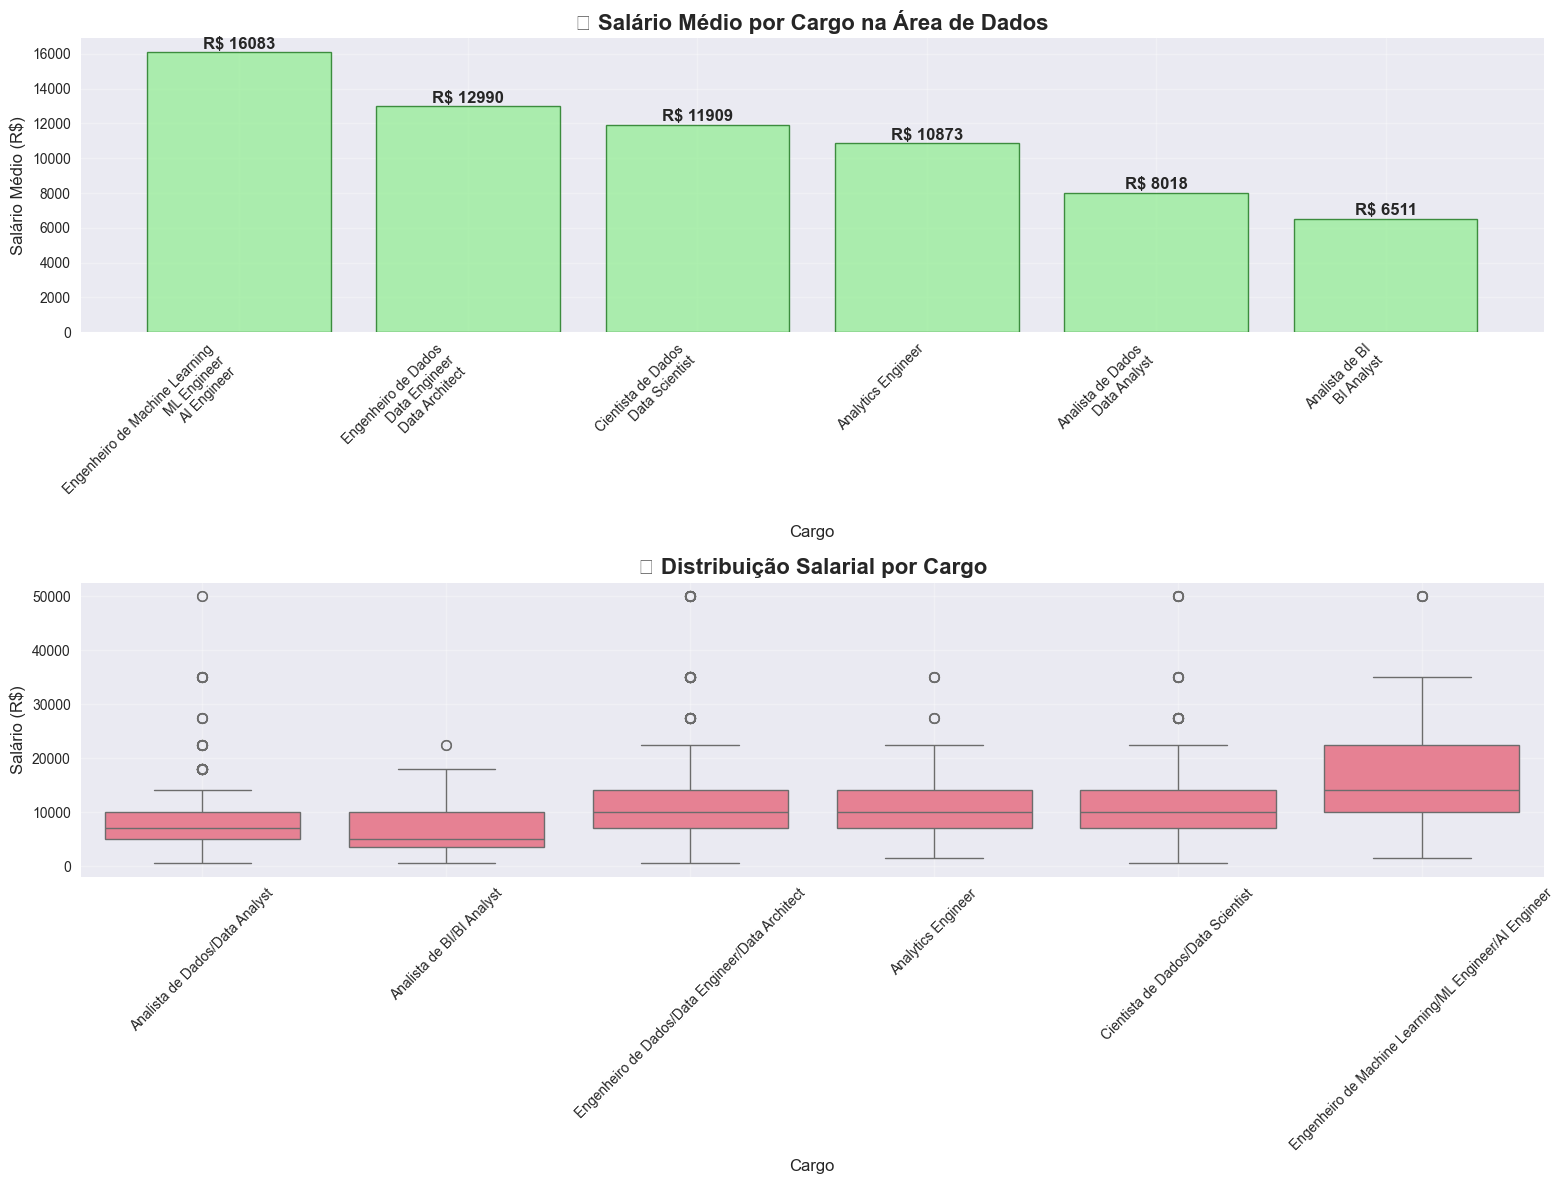

In [27]:
# Criando gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Gráfico de barras com salário médio por cargo
bars = ax1.bar(range(len(salario_por_cargo)), salario_por_cargo['mean'], 
               color='lightgreen', alpha=0.7, edgecolor='darkgreen', linewidth=1)
ax1.set_title('💼 Salário Médio por Cargo na Área de Dados', fontsize=16, fontweight='bold')
ax1.set_ylabel('Salário Médio (R$)', fontsize=12)
ax1.set_xlabel('Cargo', fontsize=12)
ax1.set_xticks(range(len(salario_por_cargo)))
ax1.set_xticklabels([cargo.replace('/', '\n') for cargo in salario_por_cargo.index], rotation=45, ha='right')
ax1.grid(True, alpha=0.3)

# Adicionando valores nas barras
for i, valor in enumerate(salario_por_cargo['mean']):
    ax1.text(i, valor + 200, f'R$ {valor:.0f}', ha='center', fontweight='bold')

# Gráfico de boxplot por cargo
sns.boxplot(data=df_cargo, x='cargo_atual', y='salario_medio', ax=ax2)
ax2.set_title('📊 Distribuição Salarial por Cargo', fontsize=16, fontweight='bold')
ax2.set_ylabel('Salário (R$)', fontsize=12)
ax2.set_xlabel('Cargo', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [28]:
# Estatísticas detalhadas por cargo
print("📊 ANÁLISE SALARIAL POR CARGO")
print("=" * 70)
print(f"{'Cargo':<40} {'Salário Médio':<15} {'Mediana':<15} {'Profissionais':<12}")
print("-" * 70)
for cargo, dados in salario_por_cargo.iterrows():
    print(f"{cargo:<40} R$ {dados['mean']:<12.0f} R$ {dados['median']:<12.0f} {dados['count']:<12.0f}")

# Identificando cargo com melhor remuneração
melhor_cargo = salario_por_cargo.index[0]
print(f"\n🏆 CARGO MAIS BEM REMUNERADO: {melhor_cargo}")
print(f"   💰 Salário Médio: R$ {salario_por_cargo.loc[melhor_cargo, 'mean']:.2f}")
print(f"   👥 Total de profissionais: {salario_por_cargo.loc[melhor_cargo, 'count']:.0f}")

📊 ANÁLISE SALARIAL POR CARGO
Cargo                                    Salário Médio   Mediana         Profissionais
----------------------------------------------------------------------
Engenheiro de Machine Learning/ML Engineer/AI Engineer R$ 16083        R$ 14000        103         
Engenheiro de Dados/Data Engineer/Data Architect R$ 12990        R$ 10000        613         
Cientista de Dados/Data Scientist        R$ 11909        R$ 10000        687         
Analytics Engineer                       R$ 10873        R$ 10000        228         
Analista de Dados/Data Analyst           R$ 8018         R$ 7000         957         
Analista de BI/BI Analyst                R$ 6511         R$ 5000         396         

🏆 CARGO MAIS BEM REMUNERADO: Engenheiro de Machine Learning/ML Engineer/AI Engineer
   💰 Salário Médio: R$ 16082.52
   👥 Total de profissionais: 103


## 6. Insights e Conclusões Principais

### 💡 Principais Descobertas da Análise


In [29]:
# Resumo executivo dos principais insights
print("🚀 RESUMO EXECUTIVO - SALÁRIOS NA ÁREA DE DADOS")
print("=" * 70)

# 1. Estatísticas gerais
print("\n📊 PANORAMA GERAL:")
print(f"   • Total de profissionais analisados: {len(df):,}")
print(f"   • Salário médio no setor: R$ {df['salario_medio'].mean():.2f}")
print(f"   • Salário mediano: R$ {df['salario_medio'].median():.2f}")
print(f"   • Faixa salarial mais comum: {df['faixa_salarial'].mode().iloc[0]}")

🚀 RESUMO EXECUTIVO - SALÁRIOS NA ÁREA DE DADOS

📊 PANORAMA GERAL:
   • Total de profissionais analisados: 4,863
   • Salário médio no setor: R$ 12135.10
   • Salário mediano: R$ 10000.00
   • Faixa salarial mais comum: de R$ 8.001/mês a R$ 12.000/mês


In [30]:
# 2. Análise por gênero
df_genero = df[df['genero'].isin(['Masculino', 'Feminino'])]
gap_salarial = ((df_genero[df_genero['genero'] == 'Masculino']['salario_medio'].mean() - 
                df_genero[df_genero['genero'] == 'Feminino']['salario_medio'].mean()) / 
                df_genero[df_genero['genero'] == 'Masculino']['salario_medio'].mean()) * 100

print(f"\n⚖️ ANÁLISE POR GÊNERO:")
print(f"   • Gap salarial entre homens e mulheres: {gap_salarial:.1f}%")
print(f"   • Salário médio masculino: R$ {df_genero[df_genero['genero'] == 'Masculino']['salario_medio'].mean():.2f}")
print(f"   • Salário médio feminino: R$ {df_genero[df_genero['genero'] == 'Feminino']['salario_medio'].mean():.2f}")


⚖️ ANÁLISE POR GÊNERO:
   • Gap salarial entre homens e mulheres: 19.8%
   • Salário médio masculino: R$ 12710.54
   • Salário médio feminino: R$ 10197.90


In [31]:
# 3. Análise por experiência
df_exp = df[df['tempo_experiencia_dados'].notna()]
iniciante = df_exp[df_exp['tempo_experiencia_dados'] == 'Não tenho experiência na área de dados']['salario_medio'].mean()
experiente = df_exp[df_exp['tempo_experiencia_dados'] == 'Mais de 10 anos']['salario_medio'].mean()

if not np.isnan(iniciante) and not np.isnan(experiente):
    crescimento = ((experiente - iniciante) / iniciante) * 100
    print(f"\n📈 EVOLUÇÃO POR EXPERIÊNCIA:")
    print(f"   • Crescimento salarial (iniciante → experiente): {crescimento:.1f}%")
    print(f"   • Salário médio iniciante: R$ {iniciante:.2f}")
    print(f"   • Salário médio experiente: R$ {experiente:.2f}")


📈 EVOLUÇÃO POR EXPERIÊNCIA:
   • Crescimento salarial (iniciante → experiente): 225.7%
   • Salário médio iniciante: R$ 6563.04
   • Salário médio experiente: R$ 21374.36


In [33]:
# 4. Insights regionais
print(f"\n🌍 DISTRIBUIÇÃO GEOGRÁFICA:")
top_estados = df['uf_residencia'].value_counts().head(5)
print(f"   • Estados com mais profissionais: {', '.join(top_estados.index[:3])}")
print(f"   • Concentração: {(top_estados.sum() / len(df) * 100):.1f}% dos profissionais nos top 3 estados")


🌍 DISTRIBUIÇÃO GEOGRÁFICA:
   • Estados com mais profissionais: SP, MG, PR
   • Concentração: 74.1% dos profissionais nos top 3 estados


In [34]:
# 5. Recomendações
print(f"\n🎯 RECOMENDAÇÕES PARA PROFISSIONAIS:")
print("   • Investir em experiência: forte correlação entre tempo e salário")
print("   • Focar em cargos de ML/AI: tendem a ter melhor remuneração")
print("   • Considerar especialização: cargos técnicos específicos pagam melhor")
print("   • Atenção ao gap de gênero: necessário trabalhar equidade salarial")


🎯 RECOMENDAÇÕES PARA PROFISSIONAIS:
   • Investir em experiência: forte correlação entre tempo e salário
   • Focar em cargos de ML/AI: tendem a ter melhor remuneração
   • Considerar especialização: cargos técnicos específicos pagam melhor
   • Atenção ao gap de gênero: necessário trabalhar equidade salarial


In [35]:
print(f"\n💼 PARA EMPRESAS:")
print("   • Revisar políticas de remuneração por gênero")
print("   • Estruturar planos de carreira claros")
print("   • Investir em retenção de talentos seniores")
print("   • Padronizar faixas salariais por experiência")


💼 PARA EMPRESAS:
   • Revisar políticas de remuneração por gênero
   • Estruturar planos de carreira claros
   • Investir em retenção de talentos seniores
   • Padronizar faixas salariais por experiência


## 7. Visualização Final - Dashboard Resumo

### 🎨 Gráfico Interativo com Plotly

Ainda não estamos na aula de Data Viz! Mas vamos fazer uma graça final com a nossa análise exploratória! Eu AMO o plotly, vocês vão ver o porquê!


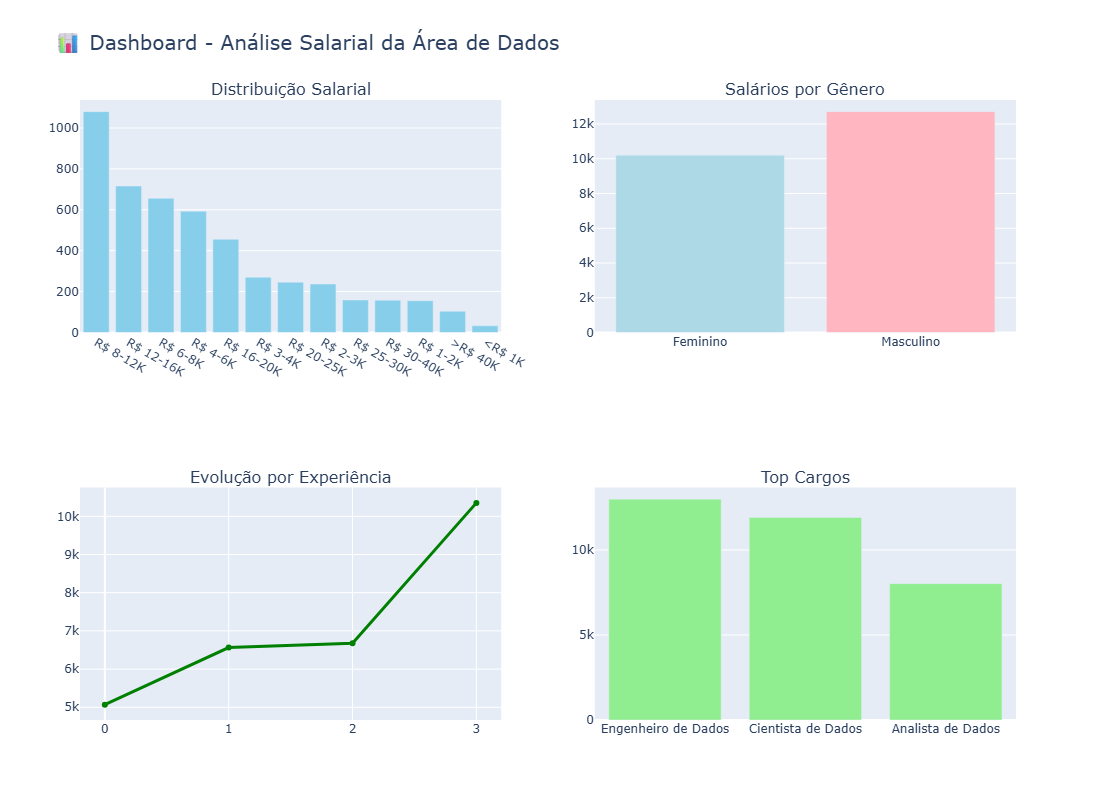

✨ Dashboard interativo criado com sucesso!
   • Explore os gráficos passando o mouse sobre eles
   • Os gráficos mostram um resumo visual dos principais insights
   • Use as ferramentas de zoom e pan para explorar os dados


In [36]:
# Criando um dashboard interativo com Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Distribuição Salarial', 'Salários por Gênero', 
                   'Evolução por Experiência', 'Top Cargos'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. Distribuição salarial
counts = df['faixa_salarial'].value_counts()
fig.add_trace(
    go.Bar(x=[labels_curtos[faixa] for faixa in counts.index], 
           y=counts.values, 
           name='Distribuição',
           marker_color='skyblue'),
    row=1, col=1
)

# 2. Salários por gênero
df_genero = df[df['genero'].isin(['Masculino', 'Feminino'])]
salario_genero = df_genero.groupby('genero')['salario_medio'].mean()
fig.add_trace(
    go.Bar(x=salario_genero.index, 
           y=salario_genero.values, 
           name='Salário por Gênero',
           marker_color=['lightblue', 'lightpink']),
    row=1, col=2
)

# 3. Evolução por experiência (apenas com dados válidos)
ordem_exp = ['Não tenho experiência na área de dados', 'Menos de 1 ano', 'de 1 a 2 anos', 'de 3 a 4 anos']
df_exp = df[df['tempo_experiencia_dados'].isin(ordem_exp)]
if len(df_exp) > 0:
    exp_data = df_exp.groupby('tempo_experiencia_dados')['salario_medio'].mean()
    fig.add_trace(
        go.Scatter(x=list(range(len(exp_data))), 
                   y=exp_data.values,
                   mode='lines+markers',
                   name='Evolução Salarial',
                   line=dict(color='green', width=3)),
        row=2, col=1
    )

# 4. Top cargos
cargos_top = ['Analista de Dados/Data Analyst', 'Cientista de Dados/Data Scientist', 
              'Engenheiro de Dados/Data Engineer/Data Architect']
df_cargos = df[df['cargo_atual'].isin(cargos_top)]
if len(df_cargos) > 0:
    cargo_data = df_cargos.groupby('cargo_atual')['salario_medio'].mean().sort_values(ascending=False)
    fig.add_trace(
        go.Bar(x=[cargo.split('/')[0] for cargo in cargo_data.index], 
               y=cargo_data.values,
               name='Salário por Cargo',
               marker_color='lightgreen'),
        row=2, col=2
    )

# Configurações do layout
fig.update_layout(
    title_text="📊 Dashboard - Análise Salarial da Área de Dados",
    title_font_size=20,
    height=800,
    showlegend=False
)

fig.show()

print("✨ Dashboard interativo criado com sucesso!")
print("   • Explore os gráficos passando o mouse sobre eles")
print("   • Os gráficos mostram um resumo visual dos principais insights")
print("   • Use as ferramentas de zoom e pan para explorar os dados")


## 8. Conclusão

### 🎯 Resultados da Análise Exploratória

Esta análise exploratória revelou insights valiosos sobre o mercado de trabalho na área de dados no Brasil:

#### 💰 **Remuneração**
- A faixa salarial mais comum está entre R$ 8.001 e R$ 12.000
- Existe uma grande variação salarial dependendo do cargo e experiência
- Profissionais com mais de 10 anos de experiência podem ganhar até 3x mais que iniciantes

#### 👥 **Equidade**
- Existe um gap salarial significativo entre homens e mulheres
- A representatividade feminina varia conforme o cargo
- Necessário trabalhar políticas de equidade salarial

#### 🚀 **Crescimento Profissional**
- Experiência é o fator mais importante para crescimento salarial
- Cargos de ML/AI tendem a ter melhor remuneração
- Especialização técnica é valorizada pelo mercado

#### 📍 **Distribuição Geográfica**
- Concentração de profissionais nos grandes centros (SP, RJ, MG)
- Possível correlação entre localização e faixa salarial
- Mercado em expansão em outras regiões

---

### 🔮 Próximos Passos

#### ESCOLHER UMA ESTRATÉGIA, UMA HIPÓTESE

Exs: 
- Quem não tem experiência ganha mais que quem tem um ano? Porque? É alguma distorção?
- Quem tem mais experiência como Analista ganha mais ou menos que outros cargos com menos experiência?
- A idade afeta mais algum profissional de dados que outro?
- O gap de gênero se mantém em todos os profissionais, idade e experiência?

OLHA O TANTO DE COISA LEGAL QUE DÁ PRA USAR!

## Conclusão da Aula 02

Parabéns! Chegamos ao final da nossa segunda aula. Agora que sabem como explorar, FUCEM BASTANTE na base de dados e procurem bons insights! Tenho certeza que nessa aula você já pensou em algo pra mandar pro desafio! 

Na próxima aula vamos EMBELEZAR nossa análise, a partir de uma hipótese, vamos criar gráficos bem bonitos, agora não mais para explorar, mas para "SE AMOSTRAR" para os jurados e juradas do Challenge!

### Técnicas Aprendidas

- **Data Cleaning**: Limpeza e preparação de dados categóricos
- **Visualização**: Criação de gráficos informativos e bonitos
- **Análise Estatística**: Cálculo de métricas descritivas
- **Dashboard**: Só um inicial, para criação de visualizações interativas

Até a próxima aula!!